In [110]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Pandas 2.1.4
NumPy 1.26.4
IPython 7.34.0


# 1. IPython.display

**IPython Display** is a tool that allows us to represent our output in many ways beyond the traditional text and numbers. For example, images, HTML, videos, audio, and even interactive widgets.

- Full APIs: https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html

## Markdown

In [111]:
s = """# Topic1
## <font color=blue>Topic2</font>
### Topic3
- Bullet 1
- Bullet 2
  1. Number 1
  2. Number 2
"""

display( Markdown(s) )

# Topic1
## <font color=blue>Topic2</font>
### Topic3
- Bullet 1
- Bullet 2
  1. Number 1
  2. Number 2


## Latex

In [112]:
s = "x^n + y^n = z^n"

display( Latex(s) )

<IPython.core.display.Latex object>

## Code

In [113]:
s = '''print(f'Hello world')
for i in range(10):
  print(i,'hello')
'''

display( Code(s) )

print(f'Hello world')
for i in range(10):
  print(i,'hello')

## Image and YouTubeVideo

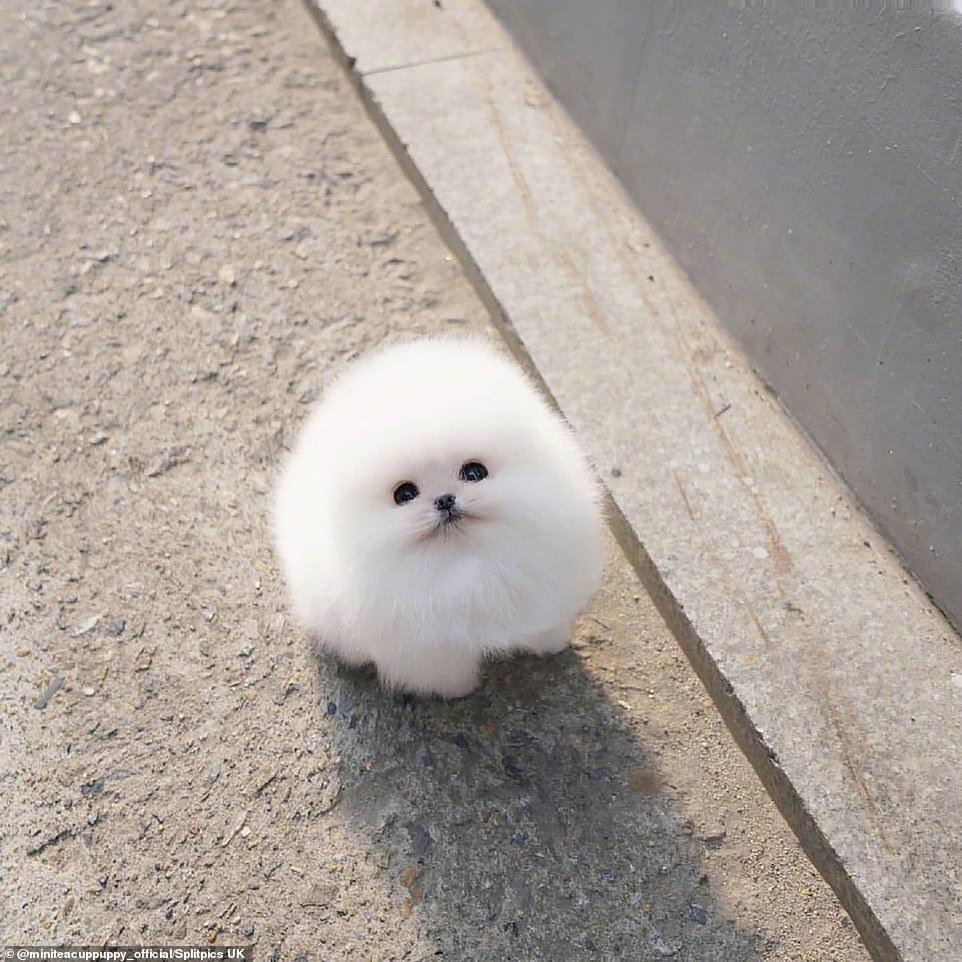

In [114]:
# Image

# Filename or url of an image
s = 'https://i.dailymail.co.uk/1s/2022/01/13/11/52879743-10397951-There_is_no_doubt_that_the_very_playful_white_Pom_pom_loves_to_b-a-2_1642074249150.jpg'

# Display
display( Image(s, width=400) )

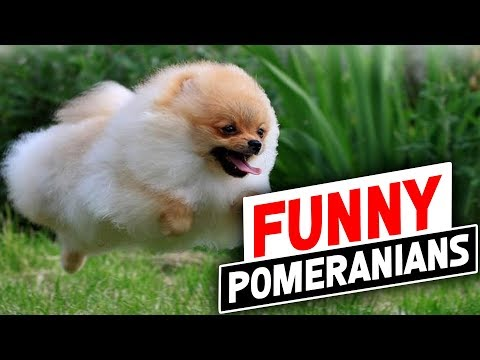

In [115]:
# YouTube video

# ID of the video
id = '-TCaQArgFU4'  # https://www.youtube.com/watch?v=-TCaQArgFU4

# Display
display( YouTubeVideo(id, start=10) )

## HTML and IFrame

In [116]:
# HTML
s = '''<h2><font color=yellow>Hello world</font></h2>
<a href='https://as.nida.ac.th/'>Go to GSAS NIDA website</a>
'''

display( HTML(s) )

In [117]:
# IFrame to display the website
s = '''https://as.nida.ac.th/'''

display( IFrame(s, width=700, height=600) )

In [118]:
# Magic command for HTML in jupyter
%%html
<h2><font color=yellow>Hello world</font></h2>
<iframe width="700" height="500" src="https://as.nida.ac.th/" title="GSAS NIDA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Clear output

Clear the output of the current cell receiving output

In [119]:
for i in range(1,26):
  print(f"{i=} Hello")
  if (i%5) == 0:
    if ( input('Clear current display (y/n)? ').strip() in ['y','Y'] ):
      clear_output()
      print('Previous outputs were cleared.')

Previous outputs were cleared.
i=11 Hello
i=12 Hello
i=13 Hello
i=14 Hello
i=15 Hello
Clear current display (y/n)? n
i=16 Hello
i=17 Hello
i=18 Hello
i=19 Hello
i=20 Hello
Clear current display (y/n)? n
i=21 Hello
i=22 Hello
i=23 Hello
i=24 Hello
i=25 Hello
Clear current display (y/n)? n


# 2. Pandas: Create data

## 2.1 Create pandas.Series (1D sequence)

In [120]:
# Let pandas figure out a suitable data type for the created Series
sr = pd.Series( [10,20.5,30.6,100,1000] )

# Inspect the data
print( f"type = {type(sr)}" )
print( f"shape = {sr.shape}" )
print( f"dtype = {sr.dtype}\n" )
print( sr )

type = <class 'pandas.core.series.Series'>
shape = (5,)
dtype = float64

0      10.0
1      20.5
2      30.6
3     100.0
4    1000.0
dtype: float64


In [121]:
# Specify the data type we want for the created Series
sr = pd.Series( [10,20.5,30.6,100,1000], dtype=np.float32 )
sr

,0
0,10.0
1,20.5
2,30.6
3,100.0
4,1000.0


In [122]:
# This command is ok in pandas 1.5.X but produces an error in pandas 2.X
sr = pd.Series( [10,20.5,30.6,100,1000], dtype=np.int32 ) # ValueError
sr

ValueError: Trying to coerce float values to integers

In [123]:
# Create a series with a proper data type to avoid an error
sr1 = pd.Series( [10,20.5,30.6,100,1000], dtype='float64' )   # The default numpy backend
sr2 = pd.Series( [10,20.5,30.6,100,1000], dtype='float64[pyarrow]' )  # The pyarrow backend

# Inspect
display(sr1)
display(sr2)

,0
0,10.0
1,20.5
2,30.6
3,100.0
4,1000.0


,0
0,10.0
1,20.5
2,30.6
3,100.0
4,1000.0


In [124]:
# Pandas uses the 'object' dtype for string by default
# The object dtype can store not only string but also mixed data types
sr1 = pd.Series( ['hello', 'good', 'morning', 'teacher' ] )

# Explicitly set the 'string' dtype for the numpy backend
# Note that 'string' is not the same as 'object' (https://stackoverflow.com/questions/34881079/pandas-distinction-between-str-and-object-types)
sr2 = pd.Series( ['hello', 'good', 'morning', 'teacher' ], dtype='string' )

# Explicitly set the 'string' dtype for the pyarrow backend
sr3 = pd.Series( ['hello', 'good', 'morning', 'teacher' ], dtype='string[pyarrow]' )

# Inspect
display(sr1)
display(sr2)
display(sr3)

,0
0,hello
1,good
2,morning
3,teacher


,0
0,hello
1,good
2,morning
3,teacher


,0
0,hello
1,good
2,morning
3,teacher


In [125]:
# Pandas will try it best to fit one suitable dtype to a Series
sr = pd.Series( ['hello', 1, 2, 10.0, True ] )
sr

,0
0,hello
1,1
2,2
3,10.0
4,True


In [126]:
# In pandas with numpy backend, the missing data is varied for different data types
print('==== Numpy ====')
sr1 = pd.Series( [10, 20, 30, None] )
display(sr1)
print( f"The last value of '{sr1.iloc[-1]}' is dtype of '{type(sr1.iloc[-1])}'" )
sr2 = pd.Series( ['car', 'ant', 'zebra', None] )
display(sr2)
print( f"The last value of '{sr2.iloc[-1]}' is dtype of '{type(sr2.iloc[-1])}'" )
sr3 = pd.Series( ['car', 'ant', 'zebra', None], dtype='string' )
display(sr3)
print( f"The last value of '{sr3.iloc[-1]}' is dtype of '{type(sr3.iloc[-1])}'" )

# In pandas with pyarrow backend, there is missing data support (NA) for all data types
print('\n==== PyArrow ====')
sr1 = pd.Series( [10, 20, 30, None], dtype='int64[pyarrow]')
display(sr1)
print( f"The last value of '{sr1.iloc[-1]}' is dtype of '{type(sr1.iloc[-1])}'" )
sr2 = pd.Series( ['car', 'ant', 'zebra', None], dtype='string[pyarrow]' )
display(sr2)
print( f"The last value of '{sr2.iloc[-1]}' is dtype of '{type(sr2.iloc[-1])}'" )

==== Numpy ====


,0
0,10.0
1,20.0
2,30.0
3,NaN


The last value of 'nan' is dtype of '<class 'numpy.float64'>'


,0
0,car
1,ant
2,zebra
3,None


The last value of 'None' is dtype of '<class 'NoneType'>'


,0
0,car
1,ant
2,zebra
3,<NA>


The last value of '<NA>' is dtype of '<class 'pandas._libs.missing.NAType'>'

==== PyArrow ====


,0
0,10
1,20
2,30
3,<NA>


The last value of '<NA>' is dtype of '<class 'pandas._libs.missing.NAType'>'


,0
0,car
1,ant
2,zebra
3,<NA>


The last value of '<NA>' is dtype of '<class 'pandas._libs.missing.NAType'>'


## 2.2 Create pandas.DataFrame (2D sequence)

In [127]:
row0 = [ 'Mary', 50000.00 ]
row1 = [ 'John', 35000 ]
row2 = [ 'George', 25333.33 ]
row3 = [ np.nan, np.nan ]   # np.nan is float that represents missing data
row4 = [ 'Jane', None ]

# Create DataFrame from a list of lists
# Use default indexing for both row and column
df = pd.DataFrame( [ row0, row1, row2, row3, row4 ] )

# Inspect the data
print( f"type = {type(df)}" )
print( f"shape = {df.shape}" )
print( f"row index = {df.index}")
print( f"column index = {df.columns}" )
print( f"\ndtypes:\n{df.dtypes}\n" )
df

type = <class 'pandas.core.frame.DataFrame'>
shape = (5, 2)
row index = RangeIndex(start=0, stop=5, step=1)
column index = RangeIndex(start=0, stop=2, step=1)

dtypes:
0     object
1    float64
dtype: object



,0,1
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


In [128]:
# Using print() with 'df' does not produce a nice-looking table
print('----- print(df) -----')
print(df)

# Use the display() command to nicely display the DataFrame
print('\n----- display(df) -----')
display(df)

----- print(df) -----
        0         1
0    Mary  50000.00
1    John  35000.00
2  George  25333.33
3     NaN       NaN
4    Jane       NaN

----- display(df) -----


,0,1
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


In [129]:
# Create DataFrame from a list of lists
# Use our own column indices
df = pd.DataFrame( [ row0, row1, row2, row3, row4 ],
                   columns=[111,222] )

print( f"row index = {df.index}")
print( f"column index = {df.columns}" )
df

row index = RangeIndex(start=0, stop=5, step=1)
column index = Index([111, 222], dtype='int64')


,111,222
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


In [130]:
# Create DataFrame from a list of lists
# Use our own column indices
df = pd.DataFrame( [ row0, row1, row2, row3, row4 ],
                   columns=['Name','Salary'] )

print( f"row index = {df.index}")
print( f"column index = {df.columns}" )
df

row index = RangeIndex(start=0, stop=5, step=1)
column index = Index(['Name', 'Salary'], dtype='object')


,Name,Salary
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


In [131]:
# Create a DataFrame from a dict of lists
# Dict's keys will become column indices
df = pd.DataFrame( {'Name':['Mary','John','George',np.nan, 'Jane'],
                    'Salary':[50000.00, 35000, 25333.33, np.nan, None] }
                 )
df

,Name,Salary
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


In [132]:
# It is possible to use our custom row indices
df = pd.DataFrame( {'Name':['Mary','John','George',np.nan, 'Jane'],
                    'Salary':[50000.00, 35000, 25333.33, np.nan, None] },
                    index=['no1','no2','no3','no4', 'no5']
                 )

print( f"row index = {df.index}")
print( f"column index = {df.columns}" )
df

row index = Index(['no1', 'no2', 'no3', 'no4', 'no5'], dtype='object')
column index = Index(['Name', 'Salary'], dtype='object')


,Name,Salary
no1,Mary,50000.00
no2,John,35000.00
no3,George,25333.33
no4,NaN,NaN
no5,Jane,NaN


In [133]:
# Reset row indices to the default 0-based integer values
df.reset_index()    # default: inplace=False, drop=False

,index,Name,Salary
0,no1,Mary,50000.00
1,no2,John,35000.00
2,no3,George,25333.33
3,no4,NaN,NaN
4,no5,Jane,NaN


In [134]:
# Reset row indices to the default and drop the old-index column
df.reset_index(drop=True)

,Name,Salary
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


In [135]:
# Assign the resultant DataFrame back to the variable
df = df.reset_index(drop=True)  # This equals to df.reset_index(drop=True, inplace=True)
df

,Name,Salary
0,Mary,50000.00
1,John,35000.00
2,George,25333.33
3,NaN,NaN
4,Jane,NaN


# 3. Pandas: Read/Load and inspect a large dataset

## 3.1 Read/Load data from an external data source

Pandas provides many easy-to-use functions to read/load tabular data from CSV, json, excel, SQL database, etc.

<font color=orange>**Tip 1:**</font> If the dataframe is too big to fit on RAM all at once, the memory error will appear. This problem can be solved by processing the data in 'chunk' using the `chunksize` parameter.

<font color=orange>**Tip 2:**</font> Use less memory when loading a large CSV file by specifying `dtype` for each column according to https://www.kaggle.com/code/marcmuc/large-csv-datasets-with-pandas-use-less-memory.

In [136]:
# Read from a CSV file (default delimiter is comma)
# Data type for each column is automatically detected unless otherwise specified.
df_pokemon = pd.read_csv('https://raw.githubusercontent.com/ShaileshDhama/Exploratory-Data-Analysis-On-Pokemon-Dataset/master/Complete%20Pokemon.csv')
df_pokemon.shape

(801, 41)

In [137]:
df = df_pokemon
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


## 3.2 Inspect a large dataset

In [138]:
df.head(3)  # Default is to print the first 5 rows

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [139]:
df.tail(10)  # Default is to print the last 5 rows

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
791,['Shadow Shield'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,NaN,792,137,107,97,psychic,ghost,120.0,7,1
792,['Beast Boost'],0.50,1.0,1.0,1.0,0.5,1.0,0.5,0.5,1.0,...,NaN,793,127,131,103,rock,poison,55.5,7,1
793,['Beast Boost'],0.50,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,NaN,794,53,53,79,bug,fighting,333.6,7,1
794,['Beast Boost'],0.50,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,NaN,795,137,37,151,bug,fighting,25.0,7,1
795,['Beast Boost'],1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,NaN,796,173,71,83,electric,NaN,100.0,7,1
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [140]:
df.sample(4)  # Default is to randomly show one row

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
666,"['Rivalry', 'Unnerve', 'Moxie']",0.5,1.0,1.0,1.0,0.5,2.0,0.5,1.0,0.0,...,11.2,667,73,54,72,fire,normal,13.5,6,0
98,"['Hyper Cutter', 'Shell Armor', 'Sheer Force']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,50.0,99,50,50,75,water,NaN,60.0,1,0
412,"['Anticipation', 'Overcoat']",2.0,1.0,1.0,0.5,1.0,0.5,4.0,4.0,1.0,...,0.0,413,69,95,36,bug,grass,6.5,4,0
182,"['Thick Fat', 'Huge Power', 'Sap Sipper']",0.5,0.5,0.0,2.0,1.0,0.5,0.5,1.0,1.0,...,50.0,183,20,50,40,water,fairy,8.5,2,0


In [141]:
# Inspect available rows and columns in the DataFrame
print( f"{df.index=}\n" )
print( f"{df.columns=}" )

df.index=RangeIndex(start=0, stop=801, step=1)

df.columns=Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


In [142]:
# df.info() is a very convenient way to overview the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

`df.describe()` for concluding the DataFrame with stat
- For numeric data, the result’s index will include count, mean, std, min, max, 25 percentile, 50 percentile (median), and 75 percentile.
- For object data (e.g. strings or timestamps), the result’s index will include count, unique, top (the most common value), and freq (the most common value’s frequency).

In [143]:
# For mixed data types, the default is to return only an analysis of numeric columns
df.describe()   # This equals to df.describe(include=np.number)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [144]:
# Return a union of attributes of each type
df.describe(include='all')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,703.000000,801.000000,801.000000,801.000000,801.000000,801,417,781.000000,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,18,NaN,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,water,flying,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,114,95,NaN,NaN,NaN
mean,NaN,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,...,55.155761,401.000000,71.305868,70.911361,66.334582,NaN,NaN,61.378105,3.690387,0.087391
std,NaN,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,...,20.261623,231.373075,32.353826,27.942501,28.907662,NaN,NaN,109.354766,1.930420,0.282583
min,NaN,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,...,0.000000,1.000000,10.000000,20.000000,5.000000,NaN,NaN,0.100000,1.000000,0.000000
25%,NaN,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,...,50.000000,201.000000,45.000000,50.000000,45.000000,NaN,NaN,9.000000,2.000000,0.000000
50%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,50.000000,401.000000,65.000000,66.000000,65.000000,NaN,NaN,27.300000,4.000000,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,50.000000,601.000000,91.000000,90.000000,85.000000,NaN,NaN,64.800000,5.000000,0.000000


In [145]:
# Limit results to object columns
df.describe(include=object)

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Fushigidaneフシギダネ,Bulbasaur,water,flying
freq,29,250,8,1,1,114,95


In [146]:
# Limit results to object and int64 columns
df.describe(include=[object, np.int64])

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,hp,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801,801,801.000000,8.010000e+02,801.000000,801,801,801.000000,801.000000,801.000000,801.000000,801,417,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,34,588,NaN,NaN,NaN,801,801,NaN,NaN,NaN,NaN,18,18,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,45,Dragon Pokémon,NaN,NaN,NaN,Fushigidaneフシギダネ,Bulbasaur,NaN,NaN,NaN,NaN,water,flying,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,250,8,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,114,95,NaN,NaN
mean,NaN,77.857678,7191.011236,65.362047,428.377029,NaN,NaN,73.008739,1.054996e+06,68.958801,NaN,NaN,401.000000,71.305868,70.911361,66.334582,NaN,NaN,3.690387,0.087391
std,NaN,32.158820,6558.220422,19.598948,119.203577,NaN,NaN,30.769159,1.602558e+05,26.576015,NaN,NaN,231.373075,32.353826,27.942501,28.907662,NaN,NaN,1.930420,0.282583
min,NaN,5.000000,1280.000000,0.000000,180.000000,NaN,NaN,5.000000,6.000000e+05,1.000000,NaN,NaN,1.000000,10.000000,20.000000,5.000000,NaN,NaN,1.000000,0.000000
25%,NaN,55.000000,5120.000000,70.000000,320.000000,NaN,NaN,50.000000,1.000000e+06,50.000000,NaN,NaN,201.000000,45.000000,50.000000,45.000000,NaN,NaN,2.000000,0.000000
50%,NaN,75.000000,5120.000000,70.000000,435.000000,NaN,NaN,70.000000,1.000000e+06,65.000000,NaN,NaN,401.000000,65.000000,66.000000,65.000000,NaN,NaN,4.000000,0.000000
75%,NaN,100.000000,6400.000000,70.000000,505.000000,NaN,NaN,90.000000,1.059860e+06,80.000000,NaN,NaN,601.000000,91.000000,90.000000,85.000000,NaN,NaN,5.000000,0.000000


In [147]:
# Limit results to non-float64 columns
df.describe(exclude='float64')

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,hp,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801,801,801.000000,8.010000e+02,801.000000,801,801,801.000000,801.000000,801.000000,801.000000,801,417,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,34,588,NaN,NaN,NaN,801,801,NaN,NaN,NaN,NaN,18,18,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,45,Dragon Pokémon,NaN,NaN,NaN,Fushigidaneフシギダネ,Bulbasaur,NaN,NaN,NaN,NaN,water,flying,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,250,8,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,114,95,NaN,NaN
mean,NaN,77.857678,7191.011236,65.362047,428.377029,NaN,NaN,73.008739,1.054996e+06,68.958801,NaN,NaN,401.000000,71.305868,70.911361,66.334582,NaN,NaN,3.690387,0.087391
std,NaN,32.158820,6558.220422,19.598948,119.203577,NaN,NaN,30.769159,1.602558e+05,26.576015,NaN,NaN,231.373075,32.353826,27.942501,28.907662,NaN,NaN,1.930420,0.282583
min,NaN,5.000000,1280.000000,0.000000,180.000000,NaN,NaN,5.000000,6.000000e+05,1.000000,NaN,NaN,1.000000,10.000000,20.000000,5.000000,NaN,NaN,1.000000,0.000000
25%,NaN,55.000000,5120.000000,70.000000,320.000000,NaN,NaN,50.000000,1.000000e+06,50.000000,NaN,NaN,201.000000,45.000000,50.000000,45.000000,NaN,NaN,2.000000,0.000000
50%,NaN,75.000000,5120.000000,70.000000,435.000000,NaN,NaN,70.000000,1.000000e+06,65.000000,NaN,NaN,401.000000,65.000000,66.000000,65.000000,NaN,NaN,4.000000,0.000000
75%,NaN,100.000000,6400.000000,70.000000,505.000000,NaN,NaN,90.000000,1.059860e+06,80.000000,NaN,NaN,601.000000,91.000000,90.000000,85.000000,NaN,NaN,5.000000,0.000000


# 4. Pandas: Select/Access data (unconditionally)

There are two main modes of accessing data in pandas:
- **Label-based indexing:** by using `df.loc[]` or `df.at[]`
- **Position-based indexing:** by using 0-based integer positions via `df.iloc[]` or `df.iat[]`

In [148]:
# Preview the dataset (just for a reminder)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


## 4.1 Select/Access one element

To access one element, positions of both row and column must be specified.

In [149]:
# Access an element in row3 col0
df.iloc[ 3, 0 ]

"['Blaze', 'Solar Power']"

In [150]:
# Access an element of row3 of the specified column
df.loc[ 3, 'abilities' ]

"['Blaze', 'Solar Power']"

`df.at[]` and `df.iat[]`:
- For accessing <u>a single value</u> only.
- Same results as `df.loc[]` and `df.iloc[]`, but `df.at[]` and `df.iat[]` are faster for accessing a single value.
- Passing many row/column indices/labels (or a slice of indices/labels) to these two commands is not allowed.

In [151]:
# Access an element in row3 col0
df.iat[ 3, 0 ]

"['Blaze', 'Solar Power']"

In [152]:
# Access an element of row3 of the specified column name
df.at[ 3, 'abilities' ]

"['Blaze', 'Solar Power']"

## 4.2 Select/Access row(s)

In [153]:
# Select row3 (with all its columns) and return it as a pandas.Series
df.iloc[ 3 ]    # This equals to df.iloc[ 3, ] and returns pandas.Series

,3
abilities,"['Blaze', 'Solar Power']"
against_bug,0.5
against_dark,1.0
against_dragon,1.0
against_electric,1.0
against_fairy,0.5
against_fight,1.0
against_fire,0.5
against_flying,1.0
against_ghost,1.0


In [154]:
# Select row3 (with all its columns) and return it as a pandas.DataFrame
df.iloc[ [3] ]    # This equals df.iloc[ [3], ] and returns pandas.DataFrame

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0


In [155]:
# Select row0, row29, and row30
df.iloc[ [29, 0, 30] ]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
29,"['Poison Point', 'Rivalry', 'Hustle']",0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,...,0.0,30,55,55,56,poison,NaN,20.0,1,0
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
30,"['Poison Point', 'Rivalry', 'Sheer Force']",0.5,1.0,1.0,0.0,0.5,0.5,1.0,1.0,1.0,...,0.0,31,75,85,76,poison,ground,60.0,1,0


In [156]:
# Select row2-row9 (slicing by integer indices is exclusive)
df.iloc[ 2:10 ]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [157]:
df.iloc[ 2:10:2 ]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
6,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
8,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0


In [158]:
df.loc[ 3 ]    # for the default row indices (0-based integer position), this is the same as df.iloc[3]

,3
abilities,"['Blaze', 'Solar Power']"
against_bug,0.5
against_dark,1.0
against_dragon,1.0
against_electric,1.0
against_fairy,0.5
against_fight,1.0
against_fire,0.5
against_flying,1.0
against_ghost,1.0


In [159]:
df.loc [ [3] ]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0


In [160]:
df[ 2:10 ]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [161]:
df[ 2 ]      # KeyError

KeyError: 2

## 4.3 Select/Access column(s)

In [162]:
df.iloc[ , 30 ]    # SyntaxError, omitting row indices isn't allowed

SyntaxError: invalid syntax (<ipython-input-162-0b7a7f9d72ff>, line 1)

In [174]:
# Select all rows in col30
df.iloc[ : , 30 ]    # This command returns pandas.Series

,name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
796,Celesteela
797,Kartana
798,Guzzlord
799,Necrozma


In [175]:
# Select all rows in col30
df.iloc[ : , [30] ]    # This command returns pandas.DataFrame

,name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
796,Celesteela
797,Kartana
798,Guzzlord
799,Necrozma


In [176]:
# Select all rows in col30 and col0
df.iloc[ : , [30,0] ]

,name,abilities
0,Bulbasaur,"['Overgrow', 'Chlorophyll']"
1,Ivysaur,"['Overgrow', 'Chlorophyll']"
2,Venusaur,"['Overgrow', 'Chlorophyll']"
3,Charmander,"['Blaze', 'Solar Power']"
4,Charmeleon,"['Blaze', 'Solar Power']"
...,...,...
796,Celesteela,['Beast Boost']
797,Kartana,['Beast Boost']
798,Guzzlord,['Beast Boost']
799,Necrozma,['Prism Armor']


In [177]:
# Select all rows in col29, col30, and col31 (exclusive slicing for integer indices)
df.iloc[ : , 29:32 ]

,japanese_name,name,percentage_male
0,Fushigidaneフシギダネ,Bulbasaur,88.1
1,Fushigisouフシギソウ,Ivysaur,88.1
2,Fushigibanaフシギバナ,Venusaur,88.1
3,Hitokageヒトカゲ,Charmander,88.1
4,Lizardoリザード,Charmeleon,88.1
...,...,...,...
796,Tekkaguyaテッカグヤ,Celesteela,NaN
797,Kamiturugiカミツルギ,Kartana,NaN
798,Akuzikingアクジキング,Guzzlord,NaN
799,Necrozmaネクロズマ,Necrozma,NaN


In [178]:
# Select all rows in col29, col31, and col33 (exclusive slicing for integer indices)
df.iloc[ : , 29:34:2 ]

,japanese_name,percentage_male,sp_attack
0,Fushigidaneフシギダネ,88.1,65
1,Fushigisouフシギソウ,88.1,80
2,Fushigibanaフシギバナ,88.1,122
3,Hitokageヒトカゲ,88.1,60
4,Lizardoリザード,88.1,80
...,...,...,...
796,Tekkaguyaテッカグヤ,NaN,107
797,Kamiturugiカミツルギ,NaN,59
798,Akuzikingアクジキング,NaN,97
799,Necrozmaネクロズマ,NaN,127


In [179]:
# Use dot notation to select one column whose name is specified
# This dot-notation writing is not applicable for any column whose name contains space or special character
df.japanese_name

,japanese_name
0,Fushigidaneフシギダネ
1,Fushigisouフシギソウ
2,Fushigibanaフシギバナ
3,Hitokageヒトカゲ
4,Lizardoリザード
...,...
796,Tekkaguyaテッカグヤ
797,Kamiturugiカミツルギ
798,Akuzikingアクジキング
799,Necrozmaネクロズマ


In [180]:
# Select one column whose name is specified
df[ 'name' ]    # This equals df.loc[ : , 'name' ] and returns a pandas.Series

,name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
796,Celesteela
797,Kartana
798,Guzzlord
799,Necrozma


In [181]:
# Select one column whose name is specified
df[ ['name'] ]  # This equals df.loc[ : , ['name'] ] and returns a pandas.DataFrame

,name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
796,Celesteela
797,Kartana
798,Guzzlord
799,Necrozma


In [182]:
# Select any columns whose names are specified
df[ ['name', 'japanese_name', 'abilities'] ]  # This equals df.loc[ : , ['name', 'japanese_name', 'abilities'] ]

,name,japanese_name,abilities
0,Bulbasaur,Fushigidaneフシギダネ,"['Overgrow', 'Chlorophyll']"
1,Ivysaur,Fushigisouフシギソウ,"['Overgrow', 'Chlorophyll']"
2,Venusaur,Fushigibanaフシギバナ,"['Overgrow', 'Chlorophyll']"
3,Charmander,Hitokageヒトカゲ,"['Blaze', 'Solar Power']"
4,Charmeleon,Lizardoリザード,"['Blaze', 'Solar Power']"
...,...,...,...
796,Celesteela,Tekkaguyaテッカグヤ,['Beast Boost']
797,Kartana,Kamiturugiカミツルギ,['Beast Boost']
798,Guzzlord,Akuzikingアクジキング,['Beast Boost']
799,Necrozma,Necrozmaネクロズマ,['Prism Armor']


In [183]:
# Select all rows in the range of specified columns (inclusive slicing for label indices)
df.loc[ : , 'hp':'pokedex_number' ]

,hp,japanese_name,name,percentage_male,pokedex_number
0,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1
1,60,Fushigisouフシギソウ,Ivysaur,88.1,2
2,80,Fushigibanaフシギバナ,Venusaur,88.1,3
3,39,Hitokageヒトカゲ,Charmander,88.1,4
4,58,Lizardoリザード,Charmeleon,88.1,5
...,...,...,...,...,...
796,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797
797,59,Kamiturugiカミツルギ,Kartana,NaN,798
798,223,Akuzikingアクジキング,Guzzlord,NaN,799
799,97,Necrozmaネクロズマ,Necrozma,NaN,800


In [184]:
df[ 'hp':'pokedex_number' ]   # TypeError

TypeError: cannot do slice indexing on RangeIndex with these indexers [hp] of type str

In short, the short form of `df['col_name']` is less flexible than the explicit indexer of `df.loc[]`.
- Using `df['col_name']` means that all rows must be selected. We cannot choose some rows at will.
- `df['col_name']` doesn't allow slicing.
- `df.loc[]` ensures that the original DataFrame is modified. Continue reading this issue in https://stackoverflow.com/a/48411543.

## 4.4 Select/Access both row(s) and column(s)

In [185]:
df.iloc[ [10,20,30] , 30:33 ]

,name,percentage_male,pokedex_number
10,Metapod,50.0,11
20,Spearow,50.0,21
30,Nidoqueen,0.0,31


In [186]:
df.iloc[ 2:5 , 29:32 ]

,japanese_name,name,percentage_male
2,Fushigibanaフシギバナ,Venusaur,88.1
3,Hitokageヒトカゲ,Charmander,88.1
4,Lizardoリザード,Charmeleon,88.1


In [187]:
df.loc[ [2,5,10] , 'name': ]

,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
5,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
10,Metapod,50.0,11,25,25,30,bug,NaN,9.9,1,0


In [188]:
df.loc[ [2,5,10] , 'name'::2 ]

,name,pokedex_number,sp_defense,type1,weight_kg,is_legendary
2,Venusaur,3,120,grass,100.0,0
5,Charizard,6,115,fire,90.5,0
10,Metapod,11,25,bug,9.9,0


# 5. Pandas: Make changes to the data

In [189]:
# Preview the dataset (just a reminder)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [190]:
# Rename existing columns
df2 = df.rename(columns={'abilities':'skill', 'pokedex_number':'pokedex_no'}) # default: inplace=False
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   skill              801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [191]:
# Set an existing column as the row index
# This is convenient for visualization commands that use row index as their default values for x-axis

df2 = df.set_index('name')    # default: inplace=False
df2.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [192]:
# In pandas, many operations are vectorized, making them more optimized and faster than  writing a loop ourselves
# Also, automatic broadcasting is performed underneath to match shapes of data

# Explanation
# 1. Add two pandas.Series in an element-wise manner
# 2. Divide the resultant pandas.Series with a scalar of 2 (element-wise division with automatic broadcasting)
# 3. Assign the resultant pandas.Series to the selected column; create the new column if the specified column name does not exist
df['dummy'] = ( df['against_bug'] + df['against_dark'] ) / 2

# Inspect the resultant pandas.DataFrame
df.info()

# Validate values in the newly created column
df.loc[ : , ['against_bug', 'against_dark', 'dummy'] ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

,against_bug,against_dark,dummy
0,1.00,1.0,1.000
1,1.00,1.0,1.000
2,1.00,1.0,1.000
3,0.50,1.0,0.750
4,0.50,1.0,0.750
...,...,...,...
796,0.25,1.0,0.625
797,1.00,1.0,1.000
798,2.00,0.5,1.250
799,2.00,2.0,2.000


In [193]:
# Add a new row to pandas.DataFrame by specifying row index that does not exist

# Add a new row
df.loc[ 1000 ] = pd.NA   # This equals df.loc[1000] = np.nan

# Inspect the result
print( f"{df.index=}" )
df.tail()

df.index=Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
        792,  793,  794,  795,  796,  797,  798,  799,  800, 1000],
      dtype='int64', length=802)


<ipython-input-193-7288187be811>:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[ 1000 ] = pd.NA   # This equals df.loc[1000] = np.nan


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,dummy
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,1.000
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,799,97,53,43,dark,dragon,888.0,7,1,1.250
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,800,127,89,79,psychic,NaN,230.0,7,1,2.000
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,801,130,115,65,steel,fairy,80.5,7,1,0.375
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN


To drop rows or columns, use slicing or the `drop()` method:

In [194]:
# Drop rows by slicing

# Drop three rows at the top
df = df.iloc[ 3: ]
display( df.head() )

# Drop three rows at the bottom
df = df.iloc[ :-3 ]
display( df.tail() )

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,dummy
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,0.750
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,0.750
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,6,159,115,100,fire,flying,90.5,1,0,0.625
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,7,50,64,43,water,NaN,9.0,1,0,1.000
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,8,65,80,58,water,NaN,22.5,1,0,1.000


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,dummy
794,['Beast Boost'],0.50,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,795,137,37,151,bug,fighting,25.0,7,1,0.500
795,['Beast Boost'],1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,796,173,71,83,electric,NaN,100.0,7,1,1.000
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,797,107,101,61,steel,flying,999.9,7,1,0.625
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,1.000
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,799,97,53,43,dark,dragon,888.0,7,1,1.250


In [195]:
# Drop columns by df.drop()
df = df.drop( columns=['dummy'] )  # This equals df.drop(columns=['dummy'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 3 to 798
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          796 non-null    object 
 1   against_bug        796 non-null    float64
 2   against_dark       796 non-null    float64
 3   against_dragon     796 non-null    float64
 4   against_electric   796 non-null    float64
 5   against_fairy      796 non-null    float64
 6   against_fight      796 non-null    float64
 7   against_fire       796 non-null    float64
 8   against_flying     796 non-null    float64
 9   against_ghost      796 non-null    float64
 10  against_grass      796 non-null    float64
 11  against_ground     796 non-null    float64
 12  against_ice        796 non-null    float64
 13  against_normal     796 non-null    float64
 14  against_poison     796 non-null    float64
 15  against_psychic    796 non-null    float64
 16  against_rock       796 non-null

In [196]:
# Drop rows by df.drop()
df = df.drop( index=df.index[3:6] )  # This equals df.drop( index=[3,4,5] )

print( df.index )
df.head(15)

Index([  3,   4,   5,   9,  10,  11,  12,  13,  14,  15,
       ...
       789, 790, 791, 792, 793, 794, 795, 796, 797, 798],
      dtype='int64', length=793)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0
10,['Shed Skin'],1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,50.0,11,25,25,30,bug,NaN,9.9,1,0
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,...,50.0,12,90,80,70,bug,flying,32.0,1,0
12,"['Shield Dust', 'Run Away']",0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,...,50.0,13,20,20,50,bug,poison,3.2,1,0
13,['Shed Skin'],0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,...,50.0,14,25,25,35,bug,poison,10.0,1,0
14,"['Swarm', 'Sniper']",0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,...,50.0,15,15,80,145,bug,poison,29.5,1,0
15,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",0.50,1.0,1.0,2.0,1.0,1.00,1.0,1.0,0.0,...,50.0,16,35,35,56,normal,flying,1.8,1,0


In [197]:
# Once in a while, reset row indices back to 0 ~ (N-1)
df.reset_index(drop=True, inplace=True)
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
1,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
2,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
3,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0
4,['Shed Skin'],1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,11,25,25,30,bug,NaN,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,['Beast Boost'],0.50,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,NaN,795,137,37,151,bug,fighting,25.0,7,1
789,['Beast Boost'],1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,NaN,796,173,71,83,electric,NaN,100.0,7,1
790,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
791,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1


# 6. Pandas: Sort data

In [198]:
# Select a subset of DataFrame to play around
df = df_pokemon.loc[ : , ['pokedex_number', 'name','abilities', 'type1', 'type2', 'hp', 'attack', 'defense'] ]

print(df.shape)
df.head()

(802, 8)


,pokedex_number,name,abilities,type1,type2,hp,attack,defense
0,1,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,45,49,49
1,2,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63
2,3,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,100,123
3,4,Charmander,"['Blaze', 'Solar Power']",fire,NaN,39,52,43
4,5,Charmeleon,"['Blaze', 'Solar Power']",fire,NaN,58,64,58


## 6.1 Sort by index

In [199]:
# Reorder rows based on row's indices
df.sort_index(ascending=False)  # default:axis=0, inplace=False

,pokedex_number,name,abilities,type1,type2,hp,attack,defense
1000,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
800,801,Magearna,['Soul-Heart'],steel,fairy,80,95,115
799,800,Necrozma,['Prism Armor'],psychic,NaN,97,107,101
798,799,Guzzlord,['Beast Boost'],dark,dragon,223,101,53
797,798,Kartana,['Beast Boost'],grass,steel,59,181,131
...,...,...,...,...,...,...,...,...
4,5,Charmeleon,"['Blaze', 'Solar Power']",fire,NaN,58,64,58
3,4,Charmander,"['Blaze', 'Solar Power']",fire,NaN,39,52,43
2,3,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,100,123
1,2,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63


In [200]:
# Reorder columns based on column's indices
df.sort_index(axis=1)   # default:axis=0, inplace=False

,abilities,attack,defense,hp,name,pokedex_number,type1,type2
0,"['Overgrow', 'Chlorophyll']",49,49,45,Bulbasaur,1,grass,poison
1,"['Overgrow', 'Chlorophyll']",62,63,60,Ivysaur,2,grass,poison
2,"['Overgrow', 'Chlorophyll']",100,123,80,Venusaur,3,grass,poison
3,"['Blaze', 'Solar Power']",52,43,39,Charmander,4,fire,NaN
4,"['Blaze', 'Solar Power']",64,58,58,Charmeleon,5,fire,NaN
...,...,...,...,...,...,...,...,...
797,['Beast Boost'],181,131,59,Kartana,798,grass,steel
798,['Beast Boost'],101,53,223,Guzzlord,799,dark,dragon
799,['Prism Armor'],107,101,97,Necrozma,800,psychic,NaN
800,['Soul-Heart'],95,115,80,Magearna,801,steel,fairy


## 6.2 Sort by value

In [201]:
# Reorder rows based on values in a specified column
df.sort_values( by='hp', ascending=False )  # default:axis=0, inplace=False

,pokedex_number,name,abilities,type1,type2,hp,attack,defense
241,242,Blissey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,NaN,255,10,10
112,113,Chansey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,NaN,250,5,5
798,799,Guzzlord,['Beast Boost'],dark,dragon,223,101,53
717,718,Zygarde,"['Aura Break', 'Power Construct']",dragon,ground,216,100,121
201,202,Wobbuffet,"['Shadow Tag', 'Telepathy']",psychic,NaN,190,33,58
...,...,...,...,...,...,...,...,...
438,439,Mime Jr.,"['Soundproof', 'Filter', 'Technician']",psychic,fairy,20,25,45
212,213,Shuckle,"['Sturdy', 'Gluttony', 'Contrary']",bug,rock,20,10,230
49,50,Diglett,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",ground,ground,10,55,30
291,292,Shedinja,['Wonder Guard'],bug,ghost,1,90,45


In [202]:
# Reorder rows based on values in many specified columns

# Sort by 'hp' first, then by 'attack'
df.sort_values( by=['hp','attack'], ascending=[False,True] )  # default:axis=0, inplace=False

,pokedex_number,name,abilities,type1,type2,hp,attack,defense
241,242,Blissey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,NaN,255,10,10
112,113,Chansey,"['Natural Cure', 'Serene Grace', 'Healer']",normal,NaN,250,5,5
798,799,Guzzlord,['Beast Boost'],dark,dragon,223,101,53
717,718,Zygarde,"['Aura Break', 'Power Construct']",dragon,ground,216,100,121
201,202,Wobbuffet,"['Shadow Tag', 'Telepathy']",psychic,NaN,190,33,58
...,...,...,...,...,...,...,...,...
171,172,Pichu,"['Static', 'Lightningrod']",electric,NaN,20,40,15
354,355,Duskull,"['Levitate', 'Frisk']",ghost,NaN,20,40,90
49,50,Diglett,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",ground,ground,10,55,30
291,292,Shedinja,['Wonder Guard'],bug,ghost,1,90,45


# 7. Pandas: Save/Render the output data



In [203]:
# Save as a text-only CSV file
df.to_csv('pokemon_subset.csv')

In [204]:
# Save as an Excel file (including table styling, if any)
# To style the pandas' table, wait for the "Table visualization" section in Pandas4.ipynb
df.to_excel('pokemon_subset.xlsx')

In [205]:
# Render the DataFrame to HTML codes
# Display HTML results with IPython.display

# Render
render = df.head().to_html()   # As a demo, here we show only the first 5 rows
print(f"{type(render)=}\n\nValue:\n{render}\n")

# Display
print('Display:\n')
display( HTML(render))

type(render)=<class 'str'>

Value:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pokedex_number</th>
      <th>name</th>
      <th>abilities</th>
      <th>type1</th>
      <th>type2</th>
      <th>hp</th>
      <th>attack</th>
      <th>defense</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>Bulbasaur</td>
      <td>['Overgrow', 'Chlorophyll']</td>
      <td>grass</td>
      <td>poison</td>
      <td>45</td>
      <td>49</td>
      <td>49</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Ivysaur</td>
      <td>['Overgrow', 'Chlorophyll']</td>
      <td>grass</td>
      <td>poison</td>
      <td>60</td>
      <td>62</td>
      <td>63</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>Venusaur</td>
      <td>['Overgrow', 'Chlorophyll']</td>
      <td>grass</td>
      <td>poison</td>
      <td>80</td>
      <td>100</td>
      <td>123</td>
    </tr>
  

,pokedex_number,name,abilities,type1,type2,hp,attack,defense
0,1,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,45,49,49
1,2,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63
2,3,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,100,123
3,4,Charmander,"['Blaze', 'Solar Power']",fire,NaN,39,52,43
4,5,Charmeleon,"['Blaze', 'Solar Power']",fire,NaN,58,64,58


In [206]:
# Render the DataFrame to latex codes
# Display Latex results with IPython.display

# Render
render = df.head().to_latex()   # As a demo, here we show only the first 5 rows
print(f"{type(render)=}\n\nValue:\n{render}\n")

# Display
# Unfortunately, the Latex() module in IPython.display is intended for showing math equations, not table visualization
print('Display:\n')
display( Latex(render))

type(render)=<class 'str'>

Value:
\begin{tabular}{lllllllll}
\toprule
 & pokedex_number & name & abilities & type1 & type2 & hp & attack & defense \\
\midrule
0 & 1 & Bulbasaur & ['Overgrow', 'Chlorophyll'] & grass & poison & 45 & 49 & 49 \\
1 & 2 & Ivysaur & ['Overgrow', 'Chlorophyll'] & grass & poison & 60 & 62 & 63 \\
2 & 3 & Venusaur & ['Overgrow', 'Chlorophyll'] & grass & poison & 80 & 100 & 123 \\
3 & 4 & Charmander & ['Blaze', 'Solar Power'] & fire & NaN & 39 & 52 & 43 \\
4 & 5 & Charmeleon & ['Blaze', 'Solar Power'] & fire & NaN & 58 & 64 & 58 \\
\bottomrule
\end{tabular}


Display:



<IPython.core.display.Latex object>

In [207]:
# Render the DataFrame to JSON codes
# Display JSON results with the "json" module

# Render
render = df.head().to_json()   # As a demo, here we show only the first 5 rows
print(f"{type(render)=}\nValue:\n{render}\n")  # 'render' is now a JSON string

# Convert from JSON string to JSON object
import json
json_obj = json.loads(render)
print(f"{type(json_obj)=}\nValue:\n{json_obj}\n")  # 'json_obj' is now a JSON object

# Display
print('Display:')
print( json.dumps(json_obj, indent=2) )

type(render)=<class 'str'>
Value:
{"pokedex_number":{"0":1,"1":2,"2":3,"3":4,"4":5},"name":{"0":"Bulbasaur","1":"Ivysaur","2":"Venusaur","3":"Charmander","4":"Charmeleon"},"abilities":{"0":"['Overgrow', 'Chlorophyll']","1":"['Overgrow', 'Chlorophyll']","2":"['Overgrow', 'Chlorophyll']","3":"['Blaze', 'Solar Power']","4":"['Blaze', 'Solar Power']"},"type1":{"0":"grass","1":"grass","2":"grass","3":"fire","4":"fire"},"type2":{"0":"poison","1":"poison","2":"poison","3":null,"4":null},"hp":{"0":45,"1":60,"2":80,"3":39,"4":58},"attack":{"0":49,"1":62,"2":100,"3":52,"4":64},"defense":{"0":49,"1":63,"2":123,"3":43,"4":58}}

type(json_obj)=<class 'dict'>
Value:
{'pokedex_number': {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5}, 'name': {'0': 'Bulbasaur', '1': 'Ivysaur', '2': 'Venusaur', '3': 'Charmander', '4': 'Charmeleon'}, 'abilities': {'0': "['Overgrow', 'Chlorophyll']", '1': "['Overgrow', 'Chlorophyll']", '2': "['Overgrow', 'Chlorophyll']", '3': "['Blaze', 'Solar Power']", '4': "['Blaze', 'Solar P

In [208]:
# Render the DataFrame to JSON codes
# Display JSON results with IPython.display

# Render
render = df.head().to_json()   # As a demo, here we show only the first 5 rows
print(f"{type(render)=}\nValue:\n{render}\n")  # 'render' is now a JSON string

# Convert from JSON string to JSON object
import json
json_obj = json.loads(render)
print(f"{type(json_obj)=}\nValue:\n{json_obj}\n")  # 'json_obj' is now a JSON object

# Display
# According to https://stackoverflow.com/a/51616614, a pretty JSON display is not available in Jupyter Notebook but in Jupyter Lab
print('Display:')
display( JSON(json_obj) )

type(render)=<class 'str'>
Value:
{"pokedex_number":{"0":1,"1":2,"2":3,"3":4,"4":5},"name":{"0":"Bulbasaur","1":"Ivysaur","2":"Venusaur","3":"Charmander","4":"Charmeleon"},"abilities":{"0":"['Overgrow', 'Chlorophyll']","1":"['Overgrow', 'Chlorophyll']","2":"['Overgrow', 'Chlorophyll']","3":"['Blaze', 'Solar Power']","4":"['Blaze', 'Solar Power']"},"type1":{"0":"grass","1":"grass","2":"grass","3":"fire","4":"fire"},"type2":{"0":"poison","1":"poison","2":"poison","3":null,"4":null},"hp":{"0":45,"1":60,"2":80,"3":39,"4":58},"attack":{"0":49,"1":62,"2":100,"3":52,"4":64},"defense":{"0":49,"1":63,"2":123,"3":43,"4":58}}

type(json_obj)=<class 'dict'>
Value:
{'pokedex_number': {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5}, 'name': {'0': 'Bulbasaur', '1': 'Ivysaur', '2': 'Venusaur', '3': 'Charmander', '4': 'Charmeleon'}, 'abilities': {'0': "['Overgrow', 'Chlorophyll']", '1': "['Overgrow', 'Chlorophyll']", '2': "['Overgrow', 'Chlorophyll']", '3': "['Blaze', 'Solar Power']", '4': "['Blaze', 'Solar P

<IPython.core.display.JSON object>

# PRACTICE

https://www.w3resource.com/python-exercises/pandas/movies/index.php